# Mapas (Python y R)

In [85]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import fiona
import chardet

import geopandas as gpd  # manejo de datos georefereciados
from geopandas import GeoSeries # series de datos georerenciados
from shapely.geometry import Point, LineString, Polygon, MultiLineString # objetos geométricos
from shapely.ops import nearest_points  # operaciones entre objetods geometricos
from pyproj import CRS, Geod # proyecciones a sistemas planares

import matplotlib.patches as mpatches
#import haversine as hs # distancia de grat-cricle entre puntos
#from  geopy import distance  # distancia entre puntos
#from tqdm import tqdm # contador de tiempo en un loop
from matplotlib.lines import Line2D
#import pyreadstat  # import spss files
#import unidecode

import warnings
warnings.filterwarnings('ignore') # eliminar warning messages

In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Figura 1

In [87]:
#Descargamos los shapefiles necesarios
distritos = gpd.read_file( r'../../data/trabajo_final/MAPAS/districts_1975_remake.shp' )
departamentos = gpd.read_file( r'../data/trabajo_final/MAPAS/department_peru.shp')

In [88]:
#Descargamos los polygonos necesarios
agrarian_core = gpd.read_file(r'../../data/trabajo_final/MAPAS/Figure1Geodatabase.gdb', layer= "agrozone_core2_polygons")
agrarian_zone = gpd.read_file(r'../../data/trabajo_final/MAPAS/Figure1Geodatabase.gdb', layer="agrarian_zones_polygons")

In [89]:
#Revisamos los sistemas de coordenadas
print (distritos.crs)
print (departamentos.crs)
print (agrarian_core.crs)
print (agrarian_zone.crs)

EPSG:4326
EPSG:32718
EPSG:32718
EPSG:32718


In [90]:
#Uniformizamos los geometries
departamentos_crs = departamentos.to_crs(4326)
agrarian_core_crs = agrarian_core.to_crs(4326)
agrarian_zone_crs = agrarian_zone.to_crs(4326)

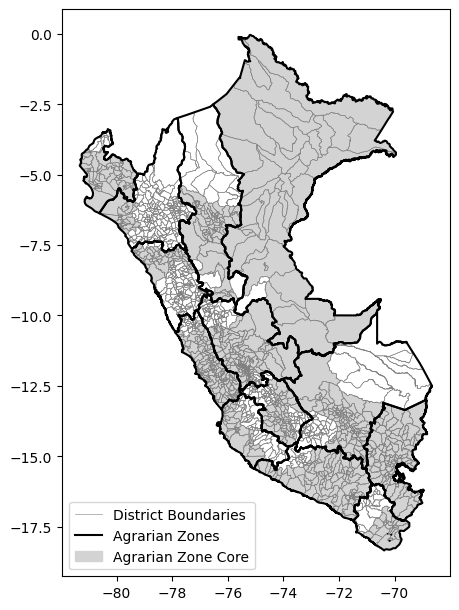

In [119]:
#Graficamos :mapa 1 figura 1

fig = plt.figure (figsize=(5,8))
ax = fig.add_subplot(111)

#Grafico agrarian zone cores
agrarian_core_crs.geometry.plot(color='lightgrey', ax=ax )
#Grafico distritos
distritos.boundary.plot(color= 'grey', ax=ax, edgecolor='0.2', linewidth=0.4)
# Agrarian zones boundaries
agrarian_zone_crs.geometry.boundary.plot(color='black', ax=ax, edgecolor='0.2', linewidth=1.5)

#Añadimos la leyenda

#Primero, creamos los handle de l
district_handle = Line2D([], [], color='grey', linewidth=0.4, label='District Boundaries')
agrarian_zone_handle = Line2D([], [], color='black', linewidth=1.5, label='Agrarian Zones')
agrarian_core_handle = mpatches.Patch(color='lightgrey', label='Agrarian Zone Core')

#En segundo lugar, creamos la leyenda
legend_handles = [district_handle, agrarian_zone_handle, agrarian_core_handle]
ax.legend(handles=legend_handles, loc='lower left')

#Guardamos el mapa
plt.savefig('fig1_mapa1.png')

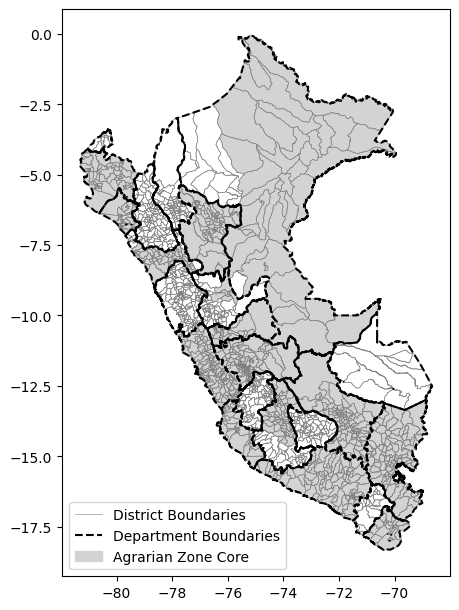

In [120]:
#Graficamos :mapa 2 figura 1

fig = plt.figure (figsize=(5,8))
ax = fig.add_subplot(111)

#Grafico agrarian zone cores
agrarian_core_crs.geometry.plot(color='lightgrey',ax=ax)
#Grafico distritos
distritos.boundary.plot(color= 'grey', ax=ax, edgecolor='0.2', linewidth=0.4)
# Departamentos boundaries
departamentos_crs.geometry.boundary.plot(color='black', ax=ax, edgecolor='0.2', linestyle='dashed',linewidth=1.5)

#Añadimos la leyenda

#Primero, creamos los handle de l
district_handle = Line2D([], [], color='grey', linewidth=0.4, label='District Boundaries')
departamentos_handle = Line2D([], [], color='black', linestyle='dashed', linewidth=1.5, label='Department Boundaries')
agrarian_core_handle = mpatches.Patch(color='lightgrey', label='Agrarian Zone Core')


legend_handles = [district_handle, departamentos_handle, agrarian_core_handle]
ax.legend(handles=legend_handles, loc='lower left')

#Guardamos el mapa
plt.savefig('fig1_mapa2.png')

### Figura 2

In [93]:
#Revisamos el file de distritos antes de hacer un merge con la data de "PeruLR 1975shapedata"
distritos

,OBJECTID_1,OBJECTID,CODDD,CODPP,CODDI,DI93,PP93,DD93,DIN93,PN93,...,Shape_Leng,Shape_Area,changed_be,comments,Name,Province,Department,Depprovdis,changed,geometry
0,2,2,01,04,02,010402,0104,01,EL CENEPA,BAGUA,...,7.537574,1.842921,0,NaN,El Cenepa,Condorcanqui,Amazonas,AmazonasCondorcanquiEl Cenepa,0,"POLYGON ((-77.80805 -3.00501, -77.80726 -3.011..."
1,5,5,06,09,03,060903,0609,06,HUARANGO,SAN IGNACIO,...,2.286597,0.073869,0,NaN,Huarango,San Ignacio,Cajamarca,CajamarcaSan IgnacioHuarango,0,"POLYGON ((-78.74168 -4.63127, -78.73969 -4.630..."
2,6,6,06,09,06,060906,0609,06,SAN JOSE DE LOURDES,SAN IGNACIO,...,1.893496,0.110788,0,NaN,San Jose De Lourdes,San Ignacio,Cajamarca,CajamarcaSan IgnacioSan Jose De Lourdes,0,"POLYGON ((-79.01263 -5.01308, -79.01185 -5.012..."
3,7,7,06,09,05,060905,0609,06,NAMBALLE,SAN IGNACIO,...,1.105131,0.056485,0,NaN,Namballe,San Ignacio,Cajamarca,CajamarcaSan IgnacioNamballe,0,"POLYGON ((-79.21066 -4.96561, -79.20942 -4.964..."
4,8,8,06,09,01,060901,0609,06,SAN IGNACIO,SAN IGNACIO,...,0.755988,0.026474,0,NaN,San Ignacio,San Ignacio,Cajamarca,CajamarcaSan IgnacioSan Ignacio,0,"POLYGON ((-79.04313 -5.00236, -79.04190 -5.003..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1794,15,01,07,02,010702,0107,01,EL PARCO,BAGUA,...,1.792227,0.087966,0,NaN,Cajaruro,Utcubamba,Amazonas,AmazonasUtcubambaCajaruro,0,"POLYGON ((-78.28912 -5.56512, -78.28854 -5.561..."
1672,1795,0,NaN,NaN,NaN,NaN,NaN,NaN,YONAN,CONTUMAZA,...,0.832777,0.029033,0,NaN,NaN,NaN,NaN,NaN,0,"POLYGON ((-79.27695 -7.24311, -79.27630 -7.240..."
1673,1796,964,09,07,16,090716,0907,09,ACRAQUIA,TAYACAJA,...,0.493730,0.008569,0,NaN,San Marcos De Rocchac,Tayacaja,Huancavelica,HuancavelicaTayacajaSan Marcos De Rocchac,0,"POLYGON ((-74.93354 -12.12509, -74.92284 -12.1..."
1674,1797,1783,10,03,06,100306,1003,10,CHUPAN,DOS DE MAYO,...,0.677156,0.016369,0,Contains CHORAS,Chavinillo,Dos De Mayo,Huanuco,HuanucoDos De MayoChavinillo,0,"POLYGON ((-76.48315 -9.74006, -76.48573 -9.741..."


In [94]:
#Revisamos el tipo de contenido de cada columna (deberán coincidir con los del archivo csv)
distritos.dtypes

OBJECTID_1       int64
OBJECTID         int64
CODDD           object
CODPP           object
CODDI           object
DI93            object
PP93            object
DD93            object
DIN93           object
PN93            object
DN93            object
Shape_Leng     float64
Shape_Area     float64
changed_be       int64
comments        object
Name            object
Province        object
Department      object
Depprovdis      object
changed          int64
geometry      geometry
dtype: object

In [95]:
#Reconocer el formato de texto del archivo csv

base = open(r'/content/drive/MyDrive/data/trabajo_final/MAPAS/PeruLR_1975shapedata.csv', 'rb').read()
det = chardet.detect(base)
charenc = det['encoding']
charenc

'UTF-8-SIG'

In [96]:
#Leer el archivo
data2 = pd.read_csv(r'/content/drive/MyDrive/data/trabajo_final/MAPAS/PeruLR_1975shapedata.csv', encoding = charenc)
data2.head( 6 )

,name,province,department,ubi12,mEE_DR_13_1980_pcSupM_adj,totalevents
0,Trinidad,Contumaza,Cajamarca,0,1.000000,NaN
1,Chachapoyas,Chachapoyas,Amazonas,10101,0.175866,0.0
2,Asuncion,Chachapoyas,Amazonas,10102,0.000000,0.0
3,Balsas,Chachapoyas,Amazonas,10103,0.018117,0.0
4,Cheto,Chachapoyas,Amazonas,10104,0.000000,0.0
5,Chiliquin,Chachapoyas,Amazonas,10105,0.000185,0.0


In [97]:
#Creamos las 2 variables pedidas, revisamos el nuevo dataframe
data2['log_expropiadas'] = data2['mEE_DR_13_1980_pcSupM_adj'].apply(lambda x: np.log(1 + 100 * x))
data2['violencia_politica'] = data2['totalevents'].apply(lambda x: np.log(0.01+x))
data2

,name,province,department,ubi12,mEE_DR_13_1980_pcSupM_adj,totalevents,log_expropiadas,violencia_politica
0,Trinidad,Contumaza,Cajamarca,0,1.000000,NaN,4.615121,NaN
1,Chachapoyas,Chachapoyas,Amazonas,10101,0.175866,0.0,2.922440,-4.605170
2,Asuncion,Chachapoyas,Amazonas,10102,0.000000,0.0,0.000000,-4.605170
3,Balsas,Chachapoyas,Amazonas,10103,0.018117,0.0,1.033791,-4.605170
4,Cheto,Chachapoyas,Amazonas,10104,0.000000,0.0,0.000000,-4.605170
...,...,...,...,...,...,...,...,...
1670,Raymondi,Coronel Portillo,Loreto,250201,0.000000,13.0,0.000000,2.565718
1671,Tahuaniya,Coronel Portillo,Loreto,250203,0.000000,1.0,0.000000,0.009950
1672,Yurua,Coronel Portillo,Loreto,250204,0.000000,0.0,0.000000,-4.605170
1673,Padre Abad,Coronel Portillo,Loreto,250301,0.025927,425.0,1.278892,6.052113


In [98]:
#Verifiamos el tipo de datos de data2
data2.dtypes

name                          object
province                      object
department                    object
ubi12                          int64
mEE_DR_13_1980_pcSupM_adj    float64
totalevents                  float64
log_expropiadas              float64
violencia_politica           float64
dtype: object

In [99]:
#Cambiamos nombres para poder unificar el código
data2.rename({'name':'Name'}, axis =1 , inplace = True)
data2.rename({'province':'Province'}, axis =1 , inplace = True)
data2.rename({'department':'Department'}, axis =1 , inplace = True)


In [100]:
# Hacemos el merge
merged_data = distritos.merge(data2, on=['Name', 'Province', 'Department'], how='left')
merged_data

,OBJECTID_1,OBJECTID,CODDD,CODPP,CODDI,DI93,PP93,DD93,DIN93,PN93,...,Province,Department,Depprovdis,changed,geometry,ubi12,mEE_DR_13_1980_pcSupM_adj,totalevents,log_expropiadas,violencia_politica
0,2,2,01,04,02,010402,0104,01,EL CENEPA,BAGUA,...,Condorcanqui,Amazonas,AmazonasCondorcanquiEl Cenepa,0,"POLYGON ((-77.80805 -3.00501, -77.80726 -3.011...",NaN,NaN,NaN,NaN,NaN
1,5,5,06,09,03,060903,0609,06,HUARANGO,SAN IGNACIO,...,San Ignacio,Cajamarca,CajamarcaSan IgnacioHuarango,0,"POLYGON ((-78.74168 -4.63127, -78.73969 -4.630...",60903.0,0.000000,0.0,0.000000,-4.605170
2,6,6,06,09,06,060906,0609,06,SAN JOSE DE LOURDES,SAN IGNACIO,...,San Ignacio,Cajamarca,CajamarcaSan IgnacioSan Jose De Lourdes,0,"POLYGON ((-79.01263 -5.01308, -79.01185 -5.012...",NaN,NaN,NaN,NaN,NaN
3,7,7,06,09,05,060905,0609,06,NAMBALLE,SAN IGNACIO,...,San Ignacio,Cajamarca,CajamarcaSan IgnacioNamballe,0,"POLYGON ((-79.21066 -4.96561, -79.20942 -4.964...",60905.0,0.033021,0.0,1.459109,-4.605170
4,8,8,06,09,01,060901,0609,06,SAN IGNACIO,SAN IGNACIO,...,San Ignacio,Cajamarca,CajamarcaSan IgnacioSan Ignacio,0,"POLYGON ((-79.04313 -5.00236, -79.04190 -5.003...",60901.0,0.289732,1.0,3.400303,0.009950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1794,15,01,07,02,010702,0107,01,EL PARCO,BAGUA,...,Utcubamba,Amazonas,AmazonasUtcubambaCajaruro,0,"POLYGON ((-78.28912 -5.56512, -78.28854 -5.561...",NaN,NaN,NaN,NaN,NaN
1672,1795,0,NaN,NaN,NaN,NaN,NaN,NaN,YONAN,CONTUMAZA,...,NaN,NaN,NaN,0,"POLYGON ((-79.27695 -7.24311, -79.27630 -7.240...",NaN,NaN,NaN,NaN,NaN
1673,1796,964,09,07,16,090716,0907,09,ACRAQUIA,TAYACAJA,...,Tayacaja,Huancavelica,HuancavelicaTayacajaSan Marcos De Rocchac,0,"POLYGON ((-74.93354 -12.12509, -74.92284 -12.1...",NaN,NaN,NaN,NaN,NaN
1674,1797,1783,10,03,06,100306,1003,10,CHUPAN,DOS DE MAYO,...,Dos De Mayo,Huanuco,HuanucoDos De MayoChavinillo,0,"POLYGON ((-76.48315 -9.74006, -76.48573 -9.741...",NaN,NaN,NaN,NaN,NaN


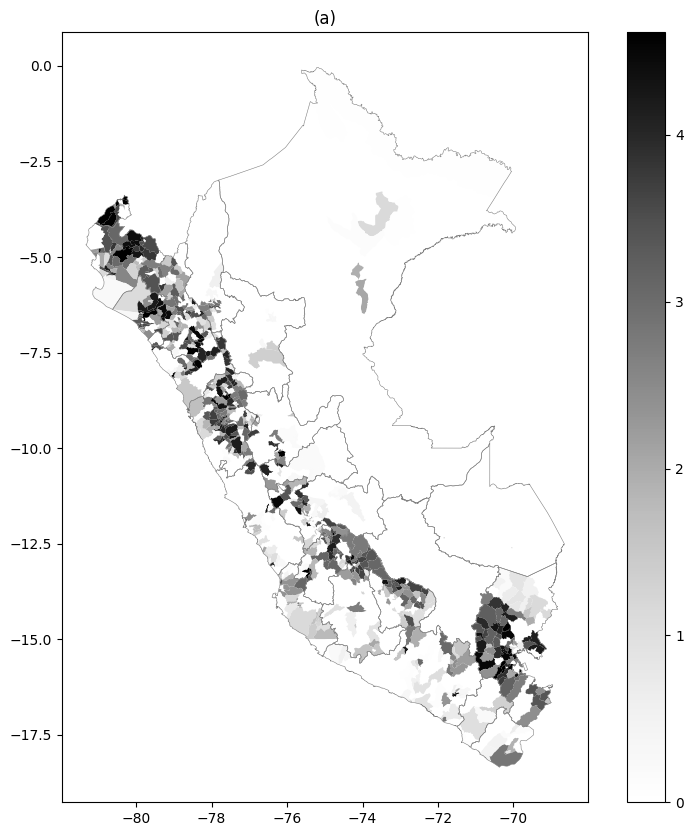

In [125]:
#Heatmap log percent land area expropiated by district

fig, ax = plt.subplots(figsize=(10, 10))

merged_data.plot(column='log_expropiadas',
           cmap='Greys',
                 legend= True,
                 ax=ax)

departamentos_crs.geometry.boundary.plot(color='gray', ax=ax, edgecolor='0.2',linewidth=0.4)
ax.set_title('(a)')
#Guardamos el mapa
plt.savefig('fig2_mapa1.png')

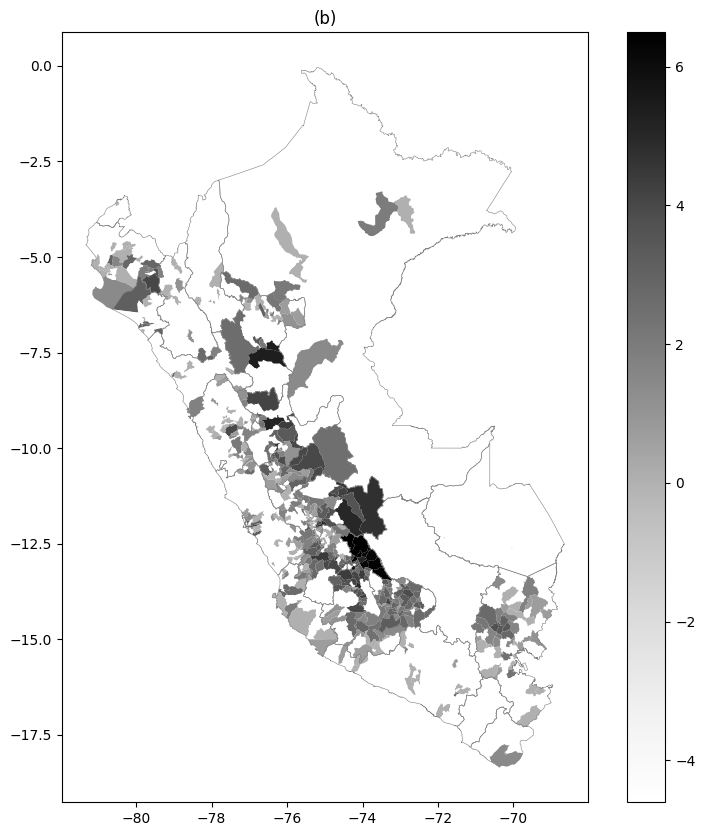

In [126]:
#Heatmap log total attacks by district

fig, ax = plt.subplots(figsize=(10, 10))

merged_data.plot(column='violencia_politica',
           cmap='Greys',
                 legend= True,
                 ax=ax)

departamentos_crs.geometry.boundary.plot(color='gray', ax=ax, edgecolor='0.2',linewidth=0.4)
ax.set_title('(b)')

#Guardamos el mapa
plt.savefig('fig2_mapa2.png')

In [ ]:
#Como algunas columnas son objects, cambiamos ello.
#data2['Name'] = data2['Name'].astype(str)
#data2['province'] = data2['province'].astype(str)
#data2['department'] = data2['department'].astype(str)
#data2['ubi12'] = data2['ubi12'].astype(int)

In [ ]:
# CODDD	CODPP	CODDI juntos son el ubigeo
#distritos['ubi12'] = distritos['CODDD'].astype(str) + distritos['CODPP'].astype(str) + distritos['CODDI'].astype(str)

#distritos